In [2]:
# import sys
# sys.executable

'/root/corona/hatespeech/hatespeech-env/bin/python'

In [4]:
import pandas as pd
import urllib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
import random


In [5]:
MAX_SENTENCES = 8
MAX_SENTENCE_LENGTH = 20

In [6]:
df = pd.read_csv('/root/corona/hatespeech/Data/data_waseem_3.csv',encoding = "ISO-8859-1")
df = df[['hate','comment']]
df = df.sample(frac=1).reset_index(drop=True)
df

,hate,comment
0,0,RT @australiacamper: Some yummy camping food o...
1,0,"@vex0rian yes, I recall. ;)"
2,0,RT @ThatSabineGirl: Those harmed by them aren'...
3,0,@AMohedin @halalflaws @haroonstyles @islamdefe...
4,0,@composerose yeah.
...,...,...
16130,0,OH HAI ROBERT ? #mkr
16131,0,@coconono under my clothes. :P the cape is in...
16132,1,@idesequera I dozed off and missed #mkr let me...
16133,0,SWF looking for long walks on the beach with a...


In [7]:
nohate_count = len(df[df['hate'] == 0])
sexism_count = len(df[df['hate'] == 1])
racism_count = len(df[df['hate'] == 2])
print(nohate_count)
print(sexism_count)
print(racism_count)

11033
3167
1935


In [8]:
nohate = df[df.hate == 0].index
sexism = df[df.hate == 1].index
racism = df[df.hate == 2].index
print(nohate)
print(sexism)
print(racism)
type(nohate)

Int64Index([    0,     1,     2,     3,     4,     7,     8,     9,    10,
               14,
            ...
            16120, 16122, 16123, 16124, 16126, 16127, 16129, 16130, 16131,
            16133],
           dtype='int64', length=11033)
Int64Index([    6,    11,    12,    13,    29,    30,    37,    49,    54,
               65,
            ...
            16086, 16090, 16092, 16093, 16095, 16097, 16101, 16102, 16114,
            16132],
           dtype='int64', length=3167)
Int64Index([    5,    26,    50,    59,    70,    79,    80,    86,    92,
              107,
            ...
            16062, 16081, 16089, 16091, 16104, 16117, 16121, 16125, 16128,
            16134],
           dtype='int64', length=1935)


pandas.core.indexes.numeric.Int64Index

In [9]:
nohate = np.random.choice(nohate,racism_count, replace=False)
sexism = np.random.choice(sexism,racism_count, replace=False)
racism = np.random.choice(racism,racism_count, replace=False)

In [10]:
print(len(nohate))
print(len(sexism))
print(len(racism))
print(len(nohate)*0.9)
print(len(nohate)*0.1)
print((len(nohate)+len(sexism)+len(racism))*0.9)

1935
1935
1935
1741.5
193.5
5224.5


In [11]:
nohate_train = nohate[:1741]
nohate_test = nohate[1741:]
sexism_train = sexism[:1741]
sexism_test = sexism[1741:]
racism_train = racism[:1741]
racism_test = racism[1741:]

In [12]:
train = np.concatenate((nohate_train,sexism_train,racism_train))
test = np.concatenate((nohate_test,sexism_test,racism_test))

In [13]:
train_df = df.loc[train]
test_df = df.loc[test]

In [14]:
train_df

,hate,comment
15636,0,@GentlerMouse hahahahhahaha.\r\n\r\nhttp://t.c...
5203,0,Pretty day in SF! http://t.co/YUV9shvowY
13787,0,@buellerishere @KellyTurner99 @isra_jourisra @...
13362,0,"@BasicMountain er, too."
10409,0,I'm in south bay and available after 3 PM if a...
...,...,...
2581,2,@Qoloob4 @Vandaliser @sajid_fairooz @IsraeliRe...
13657,2,@cdnKhadija @johnnygjokaj @BilalIGhumman @98Ha...
15704,2,@rico_hands @semzyxx @NAInfidels @owais00 Foll...
3574,2,@BDSSupporter 98% of Muslims are killed by oth...


In [15]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [16]:
train_df

,hate,comment
0,0,@SumerSloan @PAWarnhoff @etsho127 Didn't ask f...
1,0,Wow that is actually the stupidest thing I've ...
2,1,"@plaidcat9 He was also just existing, no?"
3,0,RT @DicleHaberAjans: 10 more Daesh gangs kille...
4,2,@hibach8 But it is a lie. The religion is a d...
...,...,...
5218,0,@edgeofthesandbx @batchelorshow @FearDept You ...
5219,0,@MikePrysner They mean nothing idiot. Stephan...
5220,0,@AxAs23 @BBCSport I wasn't aware this man spok...
5221,2,RT @RavenHUWolf: 2011 Article: Islamists on We...


In [17]:
train_x_data =[]
train_y_data =[]
test_x_data =[]
test_y_data =[]


length=len(train_df)
for i in range(length):
    train_x_data.append(train_df.loc[i].comment)
    train_y_data.append(train_df.loc[i].hate)
    
length=len(test_df)
for i in range(length):
    test_x_data.append(test_df.loc[i].comment)
    test_y_data.append(test_df.loc[i].hate)


In [18]:
print("len(train_x_data): {}".format(len(train_x_data)))
print("len(test_x_data): {}".format(len(test_x_data)))

len(train_x_data): 5223
len(test_x_data): 582


In [19]:
train_x_data

["@SumerSloan @PAWarnhoff @etsho127 Didn't ask for your time, or your opinion.",
 "Wow that is actually the stupidest thing I've read all day. @hashtag_fritch Swear I'm not sexist but boy meets world &gt;&gt; girl meets world",
 '@plaidcat9 He was also just existing, no?',
 'RT @DicleHaberAjans: 10 more Daesh gangs killed in Shengal\r\nhttp://t.co/ICluLnKFbT http://t.co/UDQljt2XMV',
 '@hibach8 But it is a lie.  The religion is a disgusting, terrorist, hate mongering piece of filth.  That has nothing to do with individuals.',
 "@GladysMcGee18 On the one hand, I think, no, they're horrible. On the other hand, though, I think everyone should, because it's like+",
 'So, just to save you all some time, BSD is my family. The only negative response GG ever received was from a non-dev.',
 '@truaemusic @mattybboi83 @Number10gov Because Christianity is dying out and the Christian world has reformed itself.',
 "@IndianExpress @hstapanghosh It's called reproductive imperialism and was first advoca

In [20]:
import numpy as np
#텍스트 데이터는 전처리 과정을 통해 모델에 데이터를 정제하는 과정을 필요로함
#이러한 전처리 과정에 사용할 모듈
from tensorflow.keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import to_categorical
from nltk.tokenize import sent_tokenize
import csv
import os


tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x_data)
tokenizer.fit_on_texts(test_x_data)

max_nb_words = len(tokenizer.word_index) + 1
def doc2hierarchical(text,
                     max_sentences=MAX_SENTENCES,
                     max_sentence_length=MAX_SENTENCE_LENGTH):
    sentences = sent_tokenize(text)
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen=max_sentence_length)

    pad_size = max_sentences - tokenized_sentences.shape[0]

    if pad_size <= 0:  # tokenized_sentences.shape[0] < max_sentences
        tokenized_sentences = tokenized_sentences[:max_sentences]
    else:
        tokenized_sentences = np.pad(
            tokenized_sentences, ((0, pad_size), (0, 0)),
            mode='constant', constant_values=0
        )
    
    return tokenized_sentences
            
def build_dataset(x_data, y_data, 
                  max_sentences=MAX_SENTENCES, 
                  max_sentence_length=MAX_SENTENCE_LENGTH,
                  tokenizer=tokenizer):
    
    nb_instances = len(x_data)
    
    
    X_data = np.zeros((nb_instances, max_sentences, max_sentence_length), dtype='int32')
    
    
    for i, review in enumerate(x_data):
        tokenized_sentences = doc2hierarchical(review)
            
        X_data[i] = tokenized_sentences[None, ...]
        
    nb_classes = len(set(y_data))
    Y_data = to_categorical(y_data, nb_classes)
    
    return X_data, Y_data

train_X_data, train_Y_data = build_dataset(train_x_data, train_y_data)
test_X_data, test_Y_data = build_dataset(test_x_data, test_y_data)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("test_X_data.shape: {}".format(test_X_data.shape))

print(train_X_data[0])

train_X_data.shape: (5223, 8, 20)
test_X_data.shape: (582, 8, 20)
[[  0   0   0   0   0   0   0   0   0 680 712 681 194 584  20  39  98  54
   39 544]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


In [21]:
from sklearn.model_selection import train_test_split
train_X_data, val_X_data, train_Y_data, val_Y_data = train_test_split(train_X_data, train_Y_data, 
                                                                      test_size=0.1111, 
                                                                      random_state=42)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("train_Y_data.shape: {}".format(train_Y_data.shape))
print("val_X_data.shape: {}".format(val_X_data.shape))
print("val_Y_data.shape: {}".format(val_Y_data.shape))

train_X_data.shape: (4642, 8, 20)
train_Y_data.shape: (4642, 3)
val_X_data.shape: (581, 8, 20)
val_Y_data.shape: (581, 3)


In [22]:
embedding_dir = '/root/corona/hatespeech/embedding'

def load_word2vec(tokenizer=tokenizer):
    from gensim.models import KeyedVectors
    embedding_path = os.path.join(embedding_dir, 'GoogleNews-vectors-negative300.bin')
    embeddings_index = KeyedVectors.load_word2vec_format(embedding_path, binary=True)
    
    return embeddings_index
    
def load_embedding(embedding_type='word2vec',
                   tokenizer=tokenizer,
                   embedding_dim=300):
    
    if embedding_type == 'word2vec':
        embeddings_index = load_word2vec()
        
    embedding_matrix = np.random.normal(0, 1, (max_nb_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = embeddings_index[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

embedding_matrix = load_embedding('word2vec')

print("embedding_matrix.shape: {}".format(embedding_matrix.shape))

embedding_matrix.shape: (13289, 300)


In [23]:
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()
experimental_run_tf_function=False
from tensorflow.compat.v1.keras.layers import CuDNNGRU
#from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras import backend as K
from keras.engine.topology import Layer
#from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Input, Embedding, Dense
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.layers import Bidirectional, TimeDistributed
from keras.layers import GRU
from keras.layers import BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint



In [24]:
class AttentionLayer(Layer):
    def __init__(self, attention_dim, **kwargs):
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='Attention_Weight',
                                 shape=(input_shape[-1], self.attention_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='Attention_Bias',
                                 shape=(self.attention_dim, ),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(name='Attention_Context_Vector',
                                 shape=(self.attention_dim, 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)
        
    def call(self, x):
        # refer to the original paper
        # link: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
        u_it = K.tanh(K.dot(x, self.W) + self.b)
        a_it = K.dot(u_it, self.u)
        a_it = K.squeeze(a_it, -1)
        a_it = K.softmax(a_it)
        
        return a_it
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])
    


In [25]:

def WeightedSum(attentions, representations):
    # from Shape(batch_size, len_units) to Shape(batch_size, rnn_dim * 2, len_units)
    repeated_attentions = RepeatVector(K.int_shape(representations)[-1])(attentions)
    # from Shape(batch_size, rnn_dim * 2, len_units) to Shape(batch_size, len_units, lstm_dim * 2)
    repeated_attentions = Permute([2, 1])(repeated_attentions)

    # compute representation as the weighted sum of representations
    aggregated_representation = Multiply()([representations, repeated_attentions])
    aggregated_representation = Lambda(lambda x: K.sum(x, axis=1))(aggregated_representation)

    return aggregated_representation
    
    


In [26]:
def HieAtt(embedding_matrix,
           max_sentences,
           max_sentence_length,
           nb_classes,
           embedding_dim=300,
           attention_dim=100,
           rnn_dim=50,
           include_dense_batch_normalization=False,
           include_dense_dropout=True,
           nb_dense=1,
           dense_dim=300,
           dense_dropout=0.2,
           optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)):

    # embedding_matrix = (max_nb_words + 1, embedding_dim)
    max_nb_words = embedding_matrix.shape[0] - 1
    embedding_layer = Embedding(max_nb_words + 1, 
                                embedding_dim,
                                weights=[embedding_matrix],
                                input_length=max_sentence_length,
                                trainable=False)

    # first, build a sentence encoder
    sentence_input = Input(shape=(max_sentence_length, ), dtype='int32')
    embedded_sentence = embedding_layer(sentence_input)
    embedded_sentence = Dropout(dense_dropout)(embedded_sentence)
    contextualized_sentence = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_sentence)
    
    # word attention computation
    word_attention = AttentionLayer(attention_dim)(contextualized_sentence)
    sentence_representation = WeightedSum(word_attention, contextualized_sentence)
    
    sentence_encoder = Model(inputs=[sentence_input], 
                             outputs=[sentence_representation])

    # then, build a document encoder
    document_input = Input(shape=(max_sentences, max_sentence_length), dtype='int32')
    embedded_document = TimeDistributed(sentence_encoder)(document_input)
    contextualized_document = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_document)
    
    # sentence attention computation
    sentence_attention = AttentionLayer(attention_dim)(contextualized_document)
    document_representation = WeightedSum(sentence_attention, contextualized_document)
    
    # finally, add fc layers for classification
    fc_layers = Sequential()
    for _ in range(nb_dense):
        if include_dense_batch_normalization == True:
            fc_layers.add(BatchNormalization())
        fc_layers.add(Dense(dense_dim, activation='relu'))
        if include_dense_dropout == True:
            fc_layers.add(Dropout(dense_dropout))
    fc_layers.add(Dense(nb_classes, activation='softmax'))
    
    pred_sentiment = fc_layers(document_representation)

    model = Model(inputs=[document_input],
                  outputs=[pred_sentiment])
    
    ############### build attention extractor ###############
    word_attention_extractor = Model(inputs=[sentence_input],
                                     outputs=[word_attention])
    word_attentions = TimeDistributed(word_attention_extractor)(document_input)
    attention_extractor = Model(inputs=[document_input],
                                     outputs=[word_attentions, sentence_attention])
    
    model.compile(loss=['categorical_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'])

    return model, attention_extractor




In [27]:
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()
experimental_run_tf_function=False
from tensorflow.compat.v1.keras.layers import CuDNNGRU
#from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras import backend as K
from keras.engine.topology import Layer
#from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Input, Embedding, Dense
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.layers import Bidirectional, TimeDistributed
from keras.layers import GRU
from keras.layers import BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint

class AttentionLayer(Layer):
    def __init__(self, attention_dim, **kwargs):
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='Attention_Weight',
                                 shape=(input_shape[-1], self.attention_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='Attention_Bias',
                                 shape=(self.attention_dim, ),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(name='Attention_Context_Vector',
                                 shape=(self.attention_dim, 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)
        
    def call(self, x):
        # refer to the original paper
        # link: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
        u_it = K.tanh(K.dot(x, self.W) + self.b)
        a_it = K.dot(u_it, self.u)
        a_it = K.squeeze(a_it, -1)
        a_it = K.softmax(a_it)
        
        return a_it
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])
    

def WeightedSum(attentions, representations):
    # from Shape(batch_size, len_units) to Shape(batch_size, rnn_dim * 2, len_units)
    repeated_attentions = RepeatVector(K.int_shape(representations)[-1])(attentions)
    # from Shape(batch_size, rnn_dim * 2, len_units) to Shape(batch_size, len_units, lstm_dim * 2)
    repeated_attentions = Permute([2, 1])(repeated_attentions)

    # compute representation as the weighted sum of representations
    aggregated_representation = Multiply()([representations, repeated_attentions])
    aggregated_representation = Lambda(lambda x: K.sum(x, axis=1))(aggregated_representation)

    return aggregated_representation
    
    
def HieAtt(embedding_matrix,
           max_sentences,
           max_sentence_length,
           nb_classes,
           embedding_dim=300,
           attention_dim=100,
           rnn_dim=50,
           include_dense_batch_normalization=False,
           include_dense_dropout=True,
           nb_dense=1,
           dense_dim=300,
           dense_dropout=0.2,
           optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)):

    # embedding_matrix = (max_nb_words + 1, embedding_dim)
    max_nb_words = embedding_matrix.shape[0] - 1
    embedding_layer = Embedding(max_nb_words + 1, 
                                embedding_dim,
                                weights=[embedding_matrix],
                                input_length=max_sentence_length,
                                trainable=False)

    # first, build a sentence encoder
    sentence_input = Input(shape=(max_sentence_length, ), dtype='int32')
    embedded_sentence = embedding_layer(sentence_input)
    embedded_sentence = Dropout(dense_dropout)(embedded_sentence)
    contextualized_sentence = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_sentence)
    
    # word attention computation
    word_attention = AttentionLayer(attention_dim)(contextualized_sentence)
    sentence_representation = WeightedSum(word_attention, contextualized_sentence)
    
    sentence_encoder = Model(inputs=[sentence_input], 
                             outputs=[sentence_representation])

    # then, build a document encoder
    document_input = Input(shape=(max_sentences, max_sentence_length), dtype='int32')
    embedded_document = TimeDistributed(sentence_encoder)(document_input)
    contextualized_document = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_document)
    
    # sentence attention computation
    sentence_attention = AttentionLayer(attention_dim)(contextualized_document)
    document_representation = WeightedSum(sentence_attention, contextualized_document)
    
    # finally, add fc layers for classification
    fc_layers = Sequential()
    for _ in range(nb_dense):
        if include_dense_batch_normalization == True:
            fc_layers.add(BatchNormalization())
        fc_layers.add(Dense(dense_dim, activation='relu'))
        if include_dense_dropout == True:
            fc_layers.add(Dropout(dense_dropout))
    fc_layers.add(Dense(nb_classes, activation='softmax'))
    
    pred_sentiment = fc_layers(document_representation)

    model = Model(inputs=[document_input],
                  outputs=[pred_sentiment])
    
    ############### build attention extractor ###############
    word_attention_extractor = Model(inputs=[sentence_input],
                                     outputs=[word_attention])
    word_attentions = TimeDistributed(word_attention_extractor)(document_input)
    attention_extractor = Model(inputs=[document_input],
                                     outputs=[word_attentions, sentence_attention])
    
    model.compile(loss=['categorical_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'])

    return model, attention_extractor




In [28]:
save_folder = os.path.join("/root/corona/hatespeech/models")
if not os.path.isdir(save_folder):
    os.mkdir(save_folder)
model_path = os.path.join(save_folder, "modell.h5")

checkpointer = ModelCheckpoint(filepath=model_path,
                               monitor='val_acc',
                               verbose=True,
                               save_best_only=True,
                               mode='max')

model, attention_extractor = HieAtt(embedding_matrix=embedding_matrix,
                                    max_sentences=MAX_SENTENCES,
                                    max_sentence_length=MAX_SENTENCE_LENGTH,
                                    nb_classes=3,
                                    embedding_dim=300,
                                    attention_dim=100,
                                    rnn_dim=50,
                                    include_dense_batch_normalization=False,
                                    include_dense_dropout=True,
                                    nb_dense=1,
                                    dense_dim=300,
                                    dense_dropout=0.2,
                                    optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6))


history = model.fit(x=[train_X_data],
                    y=[train_Y_data],
                    batch_size=64,
                    epochs=100,
                    verbose=True,
                    validation_data=(val_X_data, val_Y_data),
                    callbacks=[checkpointer])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 4642 samples, validate on 581 samples
Epoch 1/100
4642/4642 [==============================] - 5s 1ms/sample - loss: 1.1054 - accuracy: 0.3376 - val_loss: 1.0993 - val_accuracy: 0.3305
Epoch 2/100
4642/4642 [==============================] - 4s 852us/sample - loss: 1.1040 - accuracy: 0.3244 - val_loss: 1.0976 - val_accuracy: 0.3425
Epoch 3/100
4642/4642 [==============================] - 5s 972us/sample - loss: 1.1035 - accuracy: 0.3423 - val_loss: 1.0978 - val_accuracy: 0.3305
Epoch 4/100
4642/4642 [==============================] - 4s 966us/sample - loss: 1.1003 - accuracy: 0.3384 - val_loss: 1.0962 - val_accuracy: 0.3373
Epoch 5/100
4642/4642 [==============================] - 4s 931us/sample - loss: 1.1000 - accuracy: 0.3367 - val_loss: 1.0982 - val_accuracy: 0.4320
Epoch 6/100

4642/4642 [==============================] - 4s 967us/sample - loss: 0.7338 - accuracy: 0.6523 - val_loss: 0.6955 - val_accuracy: 0.6833
Epoch 25/100
4642/4642 [==============================] - 4s 921us/sample - loss: 0.7011 - accuracy: 0.6719 - val_loss: 0.6697 - val_accuracy: 0.6747
Epoch 26/100
4642/4642 [==============================] - 5s 990us/sample - loss: 0.6841 - accuracy: 0.6734 - val_loss: 0.6626 - val_accuracy: 0.6833
Epoch 27/100
4642/4642 [==============================] - 4s 932us/sample - loss: 0.6709 - accuracy: 0.6874 - val_loss: 0.6320 - val_accuracy: 0.7298
Epoch 28/100
4642/4642 [==============================] - 4s 804us/sample - loss: 0.6532 - accuracy: 0.6932 - val_loss: 0.6185 - val_accuracy: 0.7315
Epoch 29/100
4642/4642 [==============================] - 4s 967us/sample - loss: 0.6382 - accuracy: 0.7003 - val_loss: 0.6090 - val_accuracy: 0.7332
Epoch 30/100
4642/4642 [==============================] - 4s 895us/sample - loss: 0.6267 - accuracy: 0.7003 - val

Epoch 51/100
4642/4642 [==============================] - 4s 876us/sample - loss: 0.4508 - accuracy: 0.8050 - val_loss: 0.4926 - val_accuracy: 0.7745
Epoch 52/100
4642/4642 [==============================] - 4s 844us/sample - loss: 0.4439 - accuracy: 0.8098 - val_loss: 0.4955 - val_accuracy: 0.7831
Epoch 53/100
4642/4642 [==============================] - 4s 949us/sample - loss: 0.4445 - accuracy: 0.8111 - val_loss: 0.4932 - val_accuracy: 0.7728
Epoch 54/100
4642/4642 [==============================] - 4s 966us/sample - loss: 0.4384 - accuracy: 0.8132 - val_loss: 0.4963 - val_accuracy: 0.7797
Epoch 55/100
4642/4642 [==============================] - 5s 977us/sample - loss: 0.4380 - accuracy: 0.8141 - val_loss: 0.4973 - val_accuracy: 0.7831
Epoch 56/100
4642/4642 [==============================] - 4s 917us/sample - loss: 0.4265 - accuracy: 0.8214 - val_loss: 0.4914 - val_accuracy: 0.7797
Epoch 57/100
4642/4642 [==============================] - 4s 924us/sample - loss: 0.4263 - accuracy:

4642/4642 [==============================] - 4s 913us/sample - loss: 0.3449 - accuracy: 0.8654 - val_loss: 0.4900 - val_accuracy: 0.7866
Epoch 78/100
4642/4642 [==============================] - 4s 945us/sample - loss: 0.3470 - accuracy: 0.8593 - val_loss: 0.4891 - val_accuracy: 0.7935
Epoch 79/100
4642/4642 [==============================] - 4s 905us/sample - loss: 0.3379 - accuracy: 0.8608 - val_loss: 0.4918 - val_accuracy: 0.7866
Epoch 80/100
4642/4642 [==============================] - 5s 971us/sample - loss: 0.3382 - accuracy: 0.8643 - val_loss: 0.4932 - val_accuracy: 0.7935
Epoch 81/100
4642/4642 [==============================] - 4s 832us/sample - loss: 0.3336 - accuracy: 0.8656 - val_loss: 0.4915 - val_accuracy: 0.7866
Epoch 82/100
4642/4642 [==============================] - 4s 937us/sample - loss: 0.3317 - accuracy: 0.8673 - val_loss: 0.4997 - val_accuracy: 0.7883
Epoch 83/100
4642/4642 [==============================] - 5s 977us/sample - loss: 0.3281 - accuracy: 0.8701 - val

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


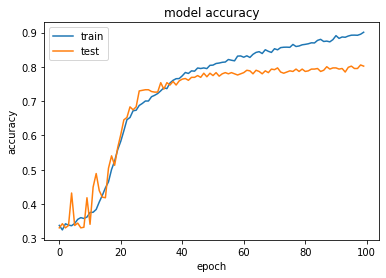

In [30]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

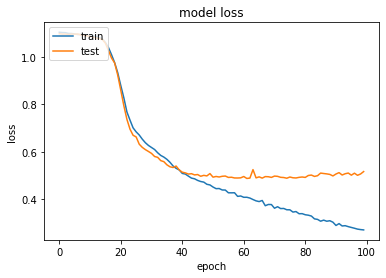

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
score = model.evaluate(test_X_data, test_Y_data, verbose=0, batch_size=64)
print("Test Accuracy of {}: {}".format(model_path, score[1]))

Test Accuracy of /root/corona/hatespeech/models/modell.h5: 0.8161512017250061


In [33]:
from numpy import argmax
from sklearn.metrics import classification_report

length = len(test_x_data)
y_true = test_y_data
y_pred = []
y_predict = model.predict(test_X_data)

for i in range(length):
    y_pred.append(argmax(y_predict[i]))

target_names = ['0', '1','2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       194
           1       0.87      0.73      0.79       194
           2       0.88      0.93      0.91       194

    accuracy                           0.82       582
   macro avg       0.82      0.82      0.82       582
weighted avg       0.82      0.82      0.82       582



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
comfmat = pd.DataFrame(confusion_matrix(y_true, y_pred), index=['nohate','sexism','racism'],columns=['nohate','sexism','racism'])
comfmat

,nohate,sexism,racism
nohate,153,22,19
sexism,48,141,5
racism,13,0,181


In [35]:
# from pandas import DataFrame
# df = DataFrame({'text': test_x_data,'true': y_true, 'predict' : y_pred})
# all_nohate = df.loc[(df['true'] == 0) & (df['predict'] == 0)]
# all_sexism = df.loc[(df['true'] == 1) & (df['predict'] == 1)]
# all_racism = df.loc[(df['true'] == 2) & (df['predict'] == 2)]

# True_nohate_Pred_sexism = df.loc[(df['true'] == 0) & (df['predict'] == 1)]
# True_nohate_Pred_racism = df.loc[(df['true'] == 0) & (df['predict'] == 2)]

# True_sexsim_Pred_nohate = df.loc[(df['true'] == 1) & (df['predict'] == 0)]
# True_sexsim_Pred_racism = df.loc[(df['true'] == 1) & (df['predict'] == 2)]

# True_racism_Pred_nohate = df.loc[(df['true'] == 2) & (df['predict'] == 0)]
# True_racism_Pred_sexism = df.loc[(df['true'] == 2) & (df['predict'] == 1)]

In [36]:
# path = './Check_result/waseem/'
# all_nohate.to_csv(path+'all_nohate.csv')
# all_sexism.to_csv(path+'all_sexism.csv')
# all_racism.to_csv(path+'all_racism.csv')

# True_nohate_Pred_sexism.to_csv(path+'True_nohate_Pred_sexism.csv')
# True_nohate_Pred_racism.to_csv(path+'True_nohate_Pred_racism.csv')

# True_sexsim_Pred_nohate.to_csv(path+'True_sexsim_Pred_nohate.csv')
# True_sexsim_Pred_racism.to_csv(path+'True_sexsim_Pred_racism.csv')

# True_racism_Pred_nohate.to_csv(path+'True_racism_Pred_nohate.csv')
# True_racism_Pred_sexism.to_csv(path+'True_racism_Pred_sexism.csv')

In [37]:
import seaborn as sns

word_rev_index={}
for word, i in tokenizer.word_index.items():
    word_rev_index[i] = word

def sentiment_analysis(review):        
    tokenized_sentences = doc2hierarchical(review)
    
    # word attention만 가져오기
    pred_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[0][0]
    sent_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[1][0]
    print(sent_attention)
    sent_att_labels=[]
    for sent_idx, sentence in enumerate(tokenized_sentences):
        if sentence[-1] == 0:
            continue
        sent_len = sent_idx
        sent_att_labels.append("Sentance "+str(sent_idx+1))
    sent_att = sent_attention[0:sent_len+1]
    sent_att = np.expand_dims(sent_att, axis=0)
    sent_att_labels = np.expand_dims(sent_att_labels, axis=0) 

    for sent_idx, sentence in enumerate(tokenized_sentences):
        if sentence[-1] == 0:
            continue
        
        for word_idx in range(MAX_SENTENCE_LENGTH):
            if sentence[word_idx] != 0:
                words = [word_rev_index[word_id] for word_id in sentence[word_idx:]]
                pred_att = pred_attention[sent_idx][-len(words):]
                pred_att = np.expand_dims(pred_att, axis=0)
                break


        fig, ax = plt.subplots(figsize=(1,1))
        plt.rc('xtick', labelsize=16)
        #cmap="Blues",cmap='YlGnBu"
        heatmap = sns.heatmap([[sent_att[0][sent_idx]]], xticklabels=False, yticklabels=False,cbar = False , annot=[[sent_att_labels[0][sent_idx]]],fmt ='', square=True, linewidths=0.1, cmap='coolwarm', center=0, vmin=0, vmax=1)
        plt.xticks(rotation=45)
        plt.show()
        
        
        
        fig, ax = plt.subplots(figsize=(len(words), 2))
        plt.rc('xtick', labelsize=16)
        pred_att
        word_list = np.expand_dims(words, axis=0)
        heatmap = sns.heatmap(pred_att, xticklabels=False, yticklabels=False,cbar=False, square=True,annot=word_list ,fmt ='', annot_kws={"alpha":1,'rotation':15},cmap ="coolwarm_r", linewidths=0.2, center=0, vmin=0, vmax=1)
        plt.xticks(rotation=45)
        plt.show()

[0.18105516 0.3954726  0.28031194 0.13257326 0.00434047 0.00222509
 0.0018747  0.00214683]


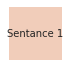

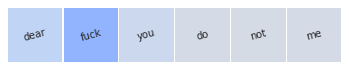

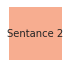

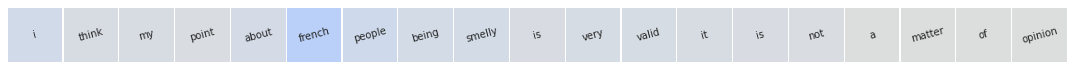

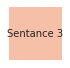

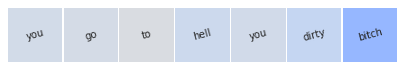

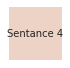

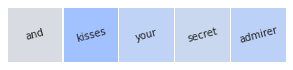

In [38]:
text =  "== Dear Yandman == Fuck you, do not censor me, cuntface. I think my point about French people being smelly frogs is very valid, it is not a matter of opinion. You go to hell you dirty bitch. Hugs and kisses Your secret admirer "
sentiment_analysis(text)